In [151]:
# Dependencias tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

# Dependencia para trabajar con archivos ZIP

#from PIL import Image
import PIL

# Otras liberías
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img_plt
import os
import glob
from pathlib import Path
import pandas as pd
import seaborn as sns

In [4]:
smooth = 1

def iou(targets, inputs):
    
    inputs = K.flatten(inputs)
    targets = K.flatten(targets)
    
    intersection = K.sum(targets * inputs)
    total = K.sum(targets) + K.sum(inputs)
    union = total - intersection
    
    IoU = (intersection + smooth) / (union + smooth)
    return IoU

In [135]:
modelo_clasificacion = tf.keras.models.load_model('data/model1_data/models/exp/model1.h5')
modelo_segmentacion = tf.keras.models.load_model('data/model2_data/models/exp/segmentation_model.h5', custom_objects={'iou':iou})

In [170]:
def inferencia(img_url):
    img = tf.io.read_file(img_url)
    img = tf.image.decode_png(img, channels=3)
    img = np.expand_dims(img, axis=0)
    img = tf.image.resize(img, (224, 224), method='nearest')

    res_clas = modelo_clasificacion.predict(img)

    if (res_clas <= 0.5 ):
        print(f'La imagen se ha predicho como frontal con una probabilidad de {res_clas}')

        img = tf.io.read_file(img_url)
        img = tf.image.decode_png(img, channels=1)
        img = np.expand_dims(img, axis=0)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, (256, 256), method='nearest')

        mask = modelo_segmentacion.predict(img)

        plt.figure(figsize=(20,10))
        plt.subplot(131)
        plt.imshow(img_plt.imread(img_url))
        plt.axis('off')
        plt.title('Imagen')
        plt.subplot(132)
        plt.imshow(tf.keras.utils.array_to_img(mask[0]))
        plt.axis('off')
        plt.title('Máscara predicha')
        plt.show()

    else:
        print(f'La imagen se ha predicho como lateral con una probabilidad de {res_clas}')


1/1 [==============================] - 0s 29ms/step
La imagen se ha predicho como frontal con una probabilidad de [[0.13678686]]
1/1 [==============================] - 0s 204ms/step


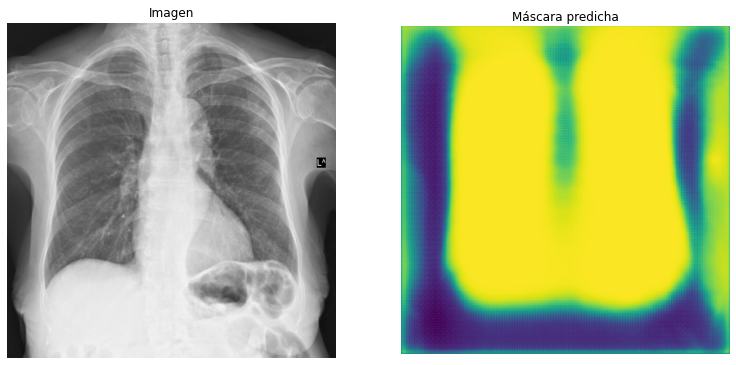

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=* 

1/1 [==============================] - 0s 23ms/step
La imagen se ha predicho como lateral con una probabilidad de [[0.9978028]]


In [182]:
inferencia('data/inferencia_images/frontal.png')
print("=*=*"*40, '\n')
inferencia('data/inferencia_images/lateral.png')